In [1]:
import pandas as pd

In [2]:
pop_df=pd.read_csv('data/population_data.csv')

In [3]:
lin_df=pd.read_csv('data/linbaliu_group.csv')
feihuo_df=pd.read_csv('data/feihuo_group.csv')
lin_df.head(),feihuo_df.head()

(   year IP Address  count
 0  2011        上海市     25
 1  2011        云南省      1
 2  2011        北京市     17
 3  2011        四川省      8
 4  2011        天津市      4,
    Time IP Address  Author Name
 0  2011        上海市           37
 1  2011        云南省           13
 2  2011     内蒙古自治区            2
 3  2011        北京市           20
 4  2011        四川省           13)

In [4]:
feihuo_df.rename(columns={'Time': 'year', 'Author Name': 'count'}, inplace=True)

In [5]:
merged_df = pd.merge(lin_df, feihuo_df, on=['year', 'IP Address'], how='outer')
merged_df

,year,IP Address,count_x,count_y
0,2011,上海市,25.0,37.0
1,2011,云南省,1.0,13.0
2,2011,北京市,17.0,20.0
3,2011,四川省,8.0,13.0
4,2011,天津市,4.0,22.0
...,...,...,...,...
449,2018,西藏自治区,NaN,2.0
450,2019,西藏自治区,NaN,1.0
451,2019,青海省,NaN,5.0
452,2020,台湾省,NaN,7.0


In [6]:
merged_df['count_x']+merged_df['count_y']

0      62.0
1      14.0
2      37.0
3      21.0
4      26.0
       ... 
449     NaN
450     NaN
451     NaN
452     NaN
453     NaN
Length: 454, dtype: float64

In [7]:
import numpy as np
np.isnan(merged_df['count_x'][453])==False

False

In [8]:
import numpy as np
counts=[]
for i in range(len(merged_df)):
    if np.isnan(merged_df['count_x'][i])==False:
        if np.isnan(merged_df['count_y'][i])==False:
            counts.append(merged_df['count_x'][i]+merged_df['count_y'][i])
        else:
            counts.append(merged_df['count_x'][i])
    else:counts.append(merged_df['count_y'][i])

In [9]:
merged_df['count']=counts
merged_df['count'].isna().any()

False

In [10]:
merged_df.drop(columns=['count_x','count_y'],inplace=True)
merged_df

,year,IP Address,count
0,2011,上海市,62.0
1,2011,云南省,14.0
2,2011,北京市,37.0
3,2011,四川省,21.0
4,2011,天津市,26.0
...,...,...,...
449,2018,西藏自治区,2.0
450,2019,西藏自治区,1.0
451,2019,青海省,5.0
452,2020,台湾省,7.0


# 总发帖人数

In [11]:
sum_df= merged_df.groupby('IP Address')['count'].sum().reset_index()

In [12]:
sum_df

,IP Address,count
0,上海市,11251.0
1,云南省,1470.0
2,内蒙古自治区,1295.0
3,北京市,16019.0
4,台湾省,50.0
5,吉林省,2270.0
6,四川省,5724.0
7,天津市,4588.0
8,宁夏回族自治区,334.0
9,安徽省,3752.0


In [13]:
# all
ratios=[]
regions=[]
for r in sum_df['IP Address'].unique():
    try:
        sum=pop_df[pop_df['region']==r]['2023'].item()*10000
    except:
        print(r)
    num=sum_df[sum_df['IP Address']==r]['count'].item()
    ratio=num/sum
    ratios.append(ratio)
    regions.append(r)

台湾省
澳门特别行政区
香港特别行政区


In [14]:
all_ratio=pd.DataFrame({
    'region':regions,'ratios':ratios
})

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取地图数据
map_data = gpd.read_file("data\chn_adm_ocha_2020_shp\chn_admbnda_adm1_ocha_2020.shp")

In [16]:
import matplotlib.colors as mcolors

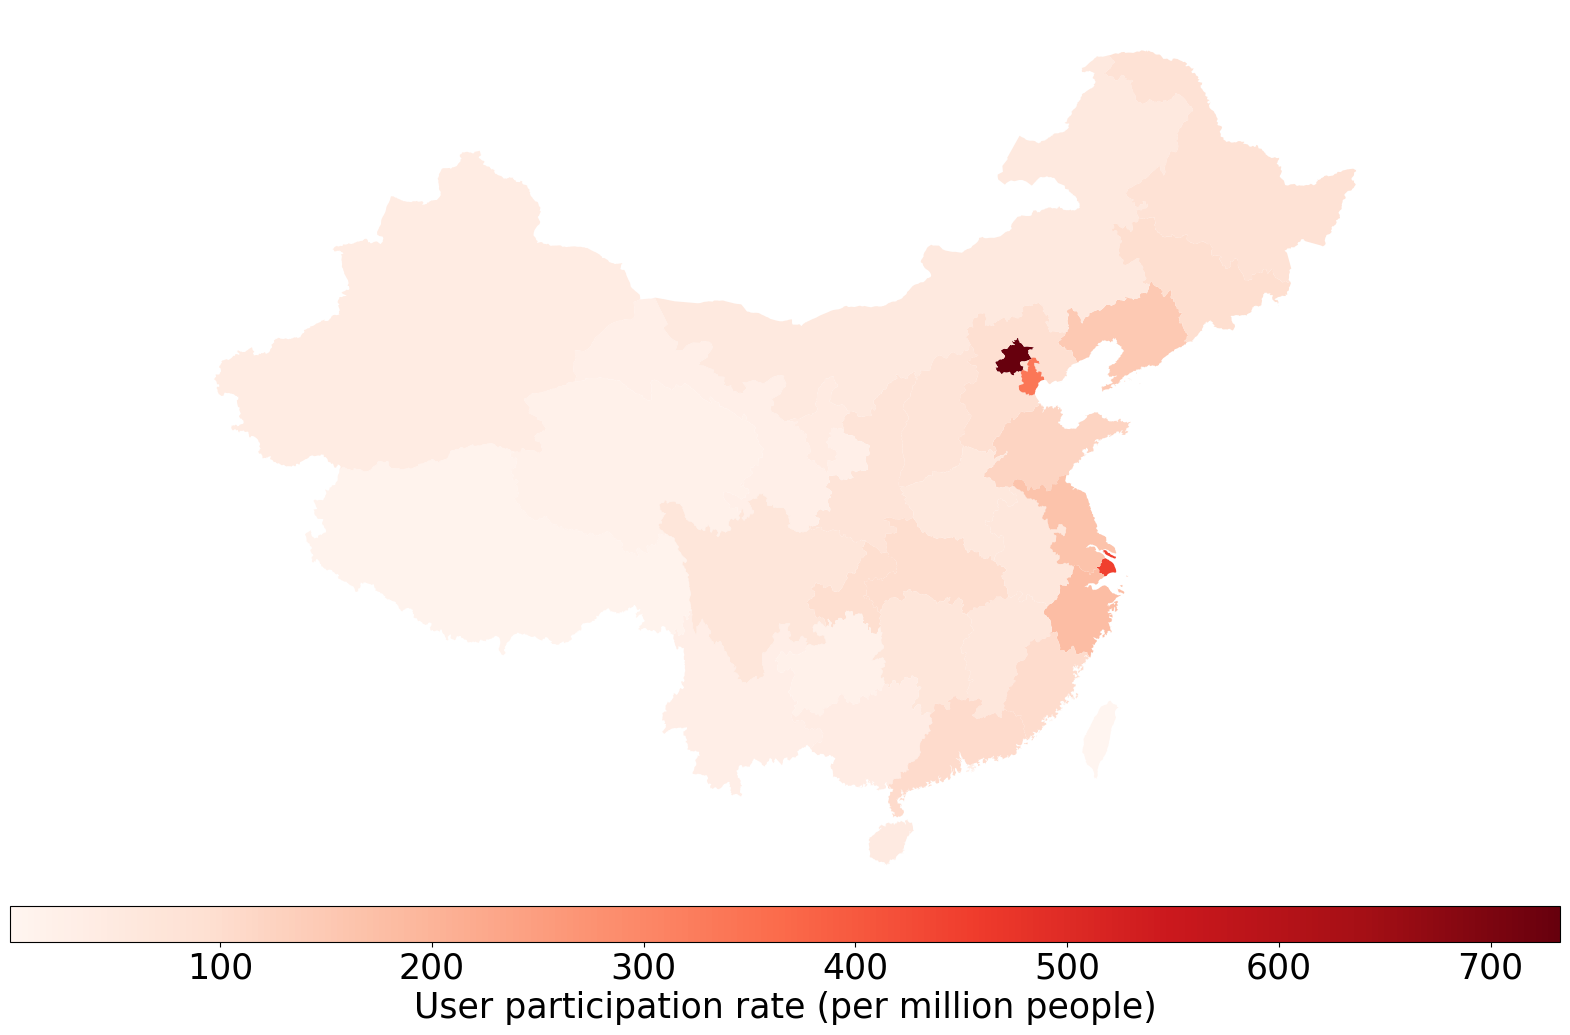

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
matplotlib.rcParams['font.size'] = 25
matplotlib.rcParams['font.weight'] = 'light'
df=map_data.copy()
ratios=[]
for r in df['ADM1_ZH']:
    try:
        ratio=all_ratio[all_ratio['region']==r]['ratios'].item()*1000000
        ratios.append(ratio)
    except:
        ratios.append(0)
df['ratios']=pd.DataFrame(ratios)
fig, ax = plt.subplots(1, 1, figsize=(20, 16))
ax.set_axis_off()
# ax.axis('off')
# 使用 make_axes_locatable 创建一个小一点的 colorbar 轴
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="4%", pad=0.0)  # size 控制宽度，pad 控制间距
df.plot(column="ratios", cmap='Reds',legend=True, ax=ax,cax=cax,
        legend_kwds={"label": "User participation rate (per million people)", 
                        "orientation": "horizontal",
                        "location":"bottom",},)
for idx, row in df.iterrows():
    plt.annotate(text=format(row['ratios'],'.1f'),xy=row['geometry'].centroid.coords[0], ha='center')
plt.show()

# 各年发帖人数

In [18]:
merged_df[merged_df['year']==2023][merged_df['IP Address']=='广东省']['count'].item()

C:\Users\86181\AppData\Local\Temp\ipykernel_20564\2876994638.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged_df[merged_df['year']==2023][merged_df['IP Address']=='广东省']['count'].item()


2073.0

In [19]:
ratios=[]
years=[]
regions=[]
for y in [str(i) for i in list(range(2011,2024,1))]:
    for r in merged_df['IP Address'].unique():
        try:
            num=merged_df[merged_df['year']==int(y)][merged_df['IP Address']==r]['count'].values[0]
        except:
            num=0
        try: 
            sum=int(pop_df[pop_df['region']==r][y].item())*10000
            ratio=num/sum
        except: ratio=0
        
        ratios.append(ratio)
        years.append(y)
        regions.append(r)

C:\Users\86181\AppData\Local\Temp\ipykernel_20564\470550758.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num=merged_df[merged_df['year']==int(y)][merged_df['IP Address']==r]['count'].values[0]


In [20]:
plot_df=pd.DataFrame({
    'year':years,'region':regions,'ratio':ratios
})

In [21]:
plot_df['ratio']

0      2.631579e-06
1      3.030303e-07
2      1.828063e-06
3      2.604167e-07
4      1.938852e-06
           ...     
437    1.515152e-06
438    0.000000e+00
439    3.561644e-06
440    0.000000e+00
441    0.000000e+00
Name: ratio, Length: 442, dtype: float64

C:\Users\86181\AppData\Local\Temp\ipykernel_20564\2192010097.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ratio=plot_df[plot_df['year']==str(year)][plot_df['region']==r]['ratio'].item()*1000000


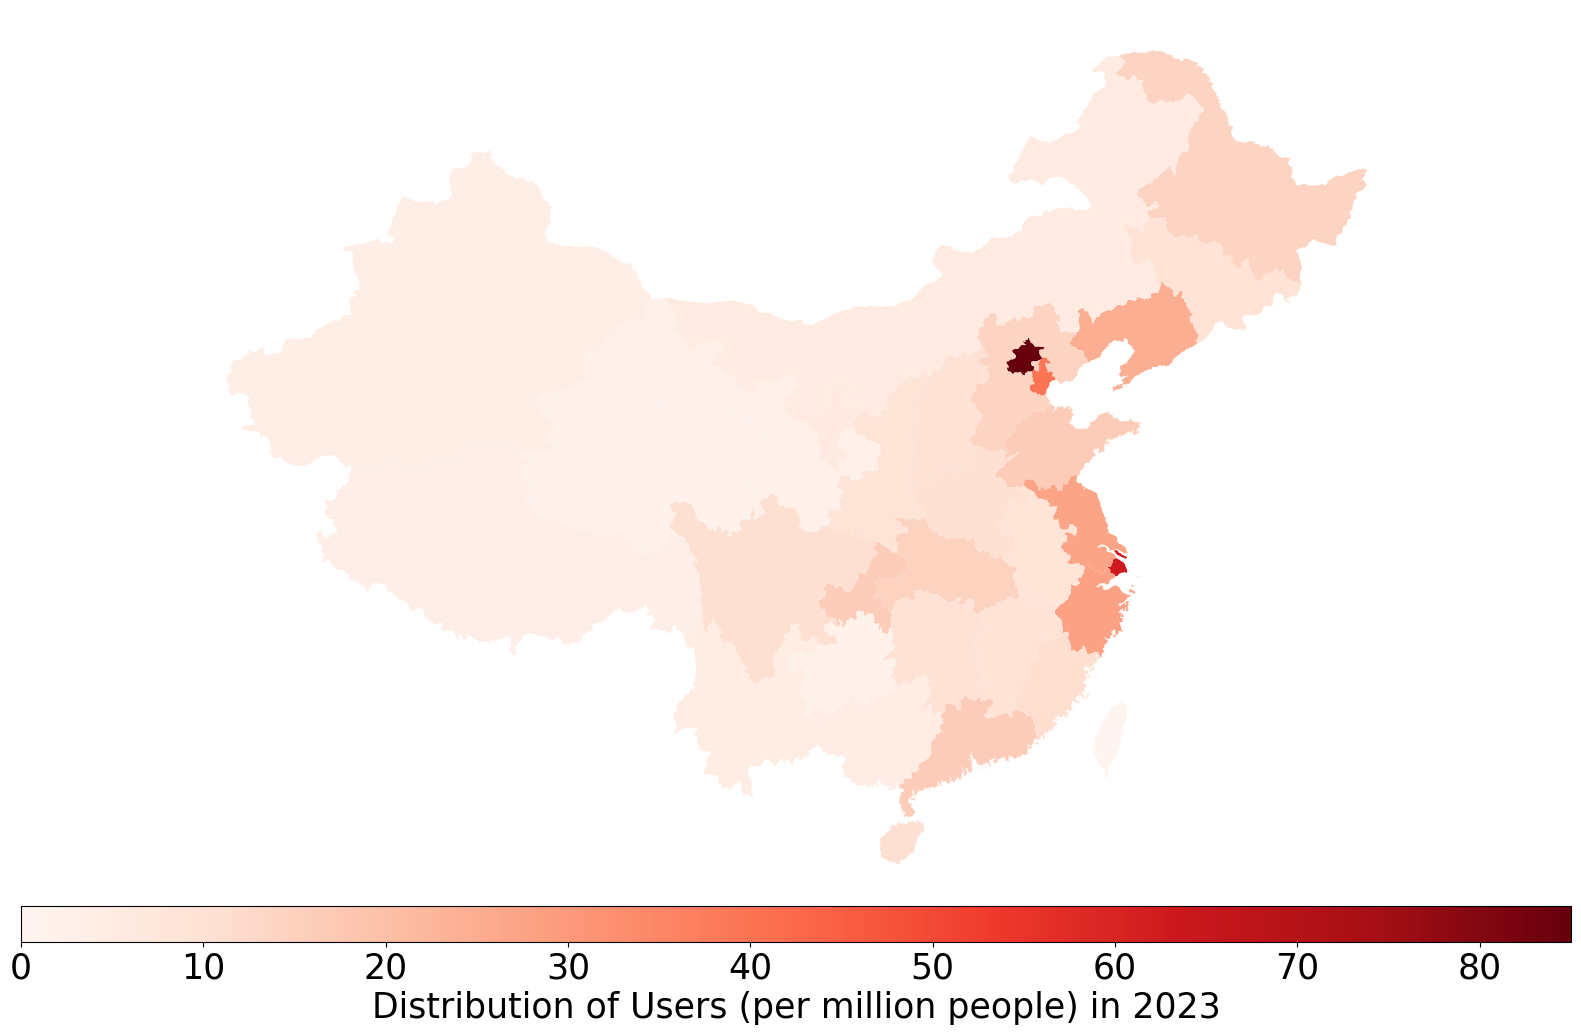

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def _plot(year:int)->None:
    import matplotlib
    matplotlib.rcParams['font.size'] = 25
    matplotlib.rcParams['font.weight'] = 'light'
    df=map_data.copy()
    ratios=[]
    for r in df['ADM1_ZH']:
        try:
            ratio=plot_df[plot_df['year']==str(year)][plot_df['region']==r]['ratio'].item()*1000000
            ratios.append(ratio)
        except:
            ratios.append(0)
    df['ratios']=pd.DataFrame(ratios)
    fig, ax = plt.subplots(1, 1, figsize=(20, 16))
    ax.set_axis_off()
    # ax.axis('off')
    # 使用 make_axes_locatable 创建一个小一点的 colorbar 轴
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="4%", pad=0.0)  # size 控制宽度，pad 控制间距
    df.plot(column="ratios", cmap='Reds',legend=True,ax=ax,norm=mcolors.Normalize(vmin=0, vmax=85),cax=cax,
            legend_kwds={"label": "Distribution of Users (per million people) in {}".format(year), 
                         "orientation": "horizontal",
                         "location":"bottom",},)
    plt.show()
_plot(2023)

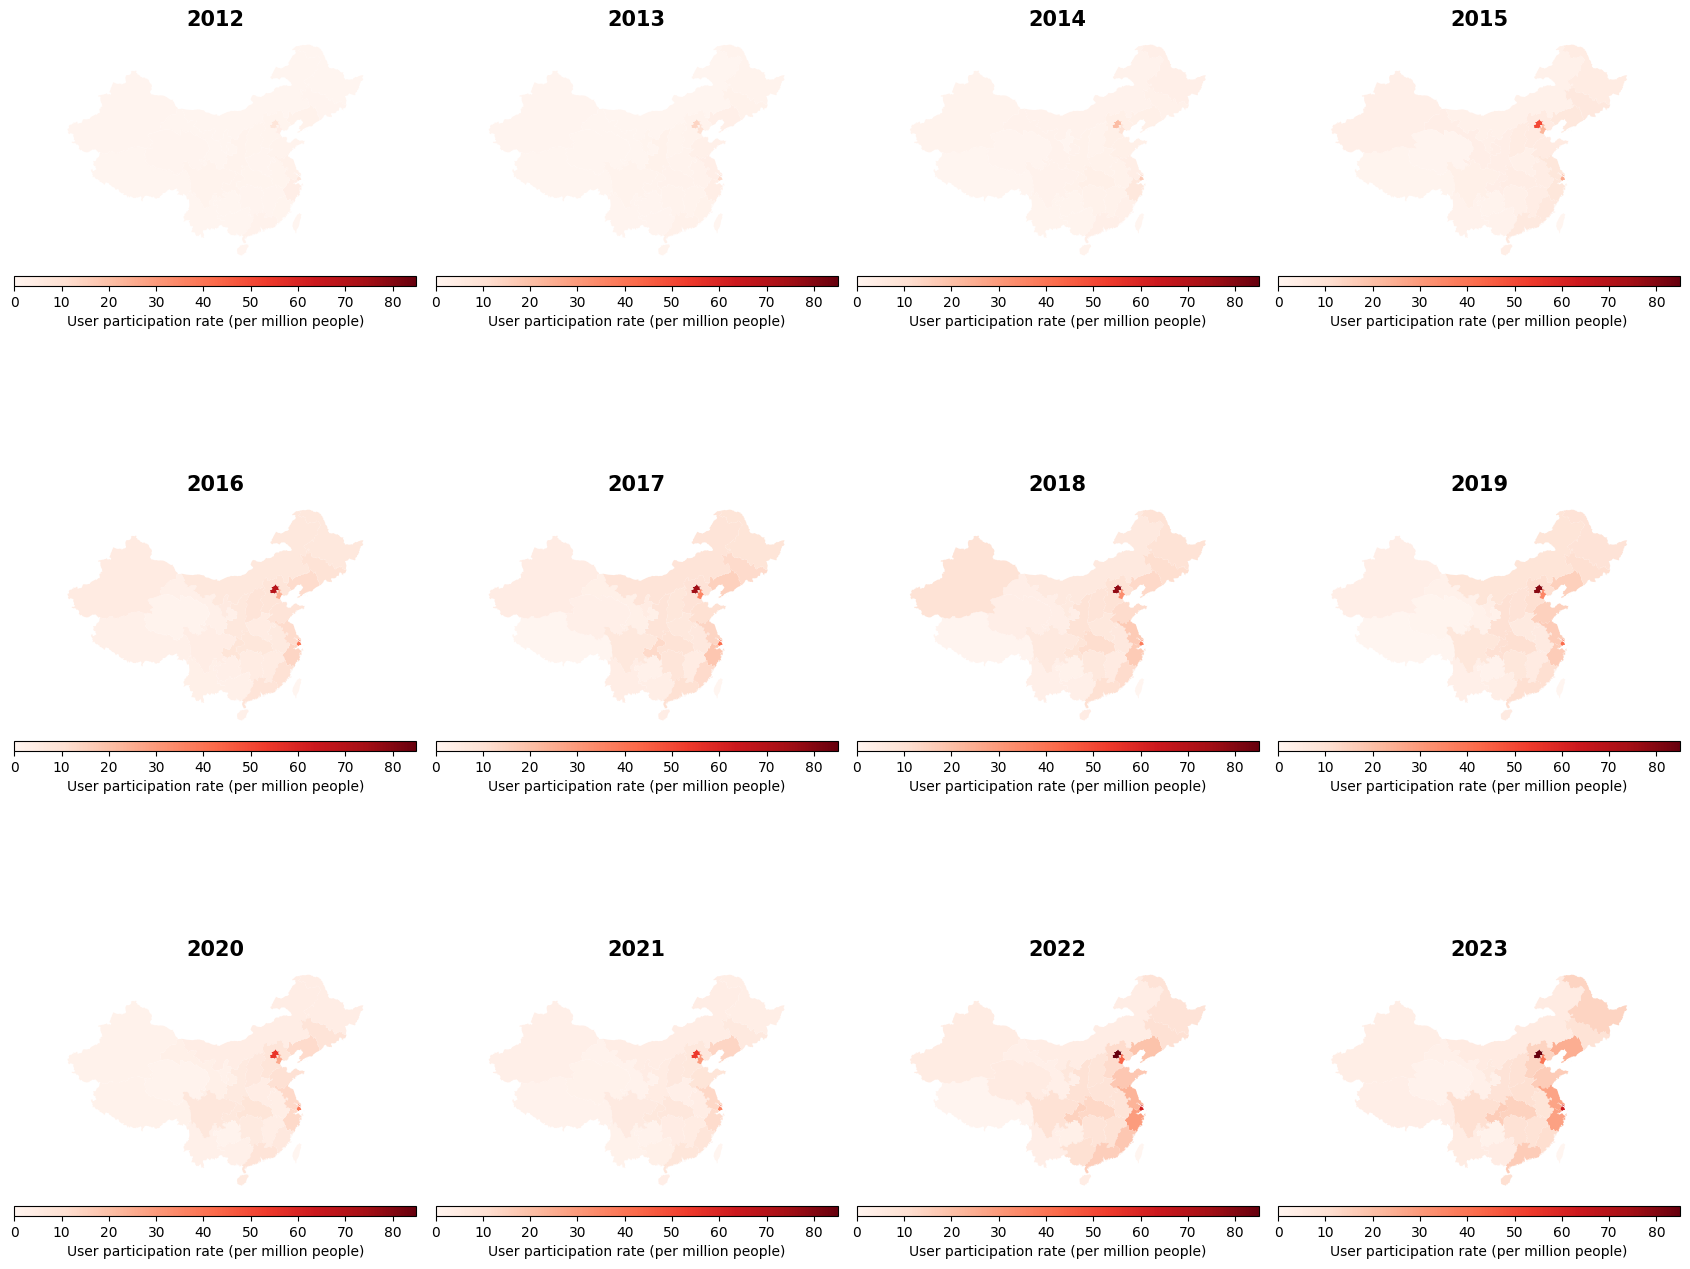

In [23]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

# 假设 map_data 和 plot_df 已经定义，且数据格式正确
def _plot(ax, year: int):
    """绘制单个年份的地图到指定的子图轴上"""
    import matplotlib
    matplotlib.rcParams['font.size'] = 10  # 调整字体大小适配子图
    matplotlib.rcParams['font.weight'] = 'light'

    df = map_data.copy()
    ratios = []
    for r in df['ADM1_ZH']:
        try:
            ratio = plot_df[
                (plot_df['year'] == str(year)) & 
                (plot_df['region'] == r)
            ]['ratio'].item() * 1000000
            ratios.append(ratio)
        except:
            ratios.append(0)
    df['ratios'] = pd.DataFrame(ratios)

    # 绘图
    ax.set_axis_off()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="4%", pad=0.1)  # 调整 colorbar 的间距和大小
    df.plot(
        column="ratios", 
        cmap='Reds', 
        legend=True, 
        ax=ax, 
        norm=mcolors.Normalize(vmin=0, vmax=85), 
        cax=cax,
        legend_kwds={
            "label": "User participation rate (per million people)", 
            "orientation": "horizontal",
        },
    )
    ax.set_title(f"{year}", fontsize=15, weight='bold')  # 添加年份标题

# 子图布局参数
years = range(2012, 2024)  # 2012-2023
n_cols = 4  # 每行 4 个子图
n_rows = -(-len(years) // n_cols)  # 计算行数（向上取整）

# 创建子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(17, n_rows * 5))
axes = axes.flatten()  # 转为 1D 数组，方便索引

# 绘制每年的数据
for i, year in enumerate(years):
    _plot(axes[i], year)

# 隐藏多余的子图
for j in range(len(years), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [24]:
for i in range(2011,2024):
    print(i)
    _plot(i)

2011


TypeError: _plot() missing 1 required positional argument: 'year'